# OASIS INFOBYTE 

# DATA SCIENCE TASK 3 : Car Price Prediction 


# VANSHIKA PATEL

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Loading the dataset
data = pd.read_csv('carprice.csv')
data.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.0
25,26,1,dodge colt hardtop,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6692.0
27,28,1,dodge coronet custom,gas,turbo,two,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558.0
176,177,-1,toyota corolla,gas,std,four,sedan,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92,4200,27,32,10898.0
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.0


In [18]:
# Selecting the relevant features for prediction
features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'horsepower',
            'citympg', 'highwaympg']

# Setting the target variable
target = 'price'

# Splitting the data into training and test sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating model accuracy
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 14317129.27
Root Mean Squared Error: 3783.80
R^2 Score: 0.82


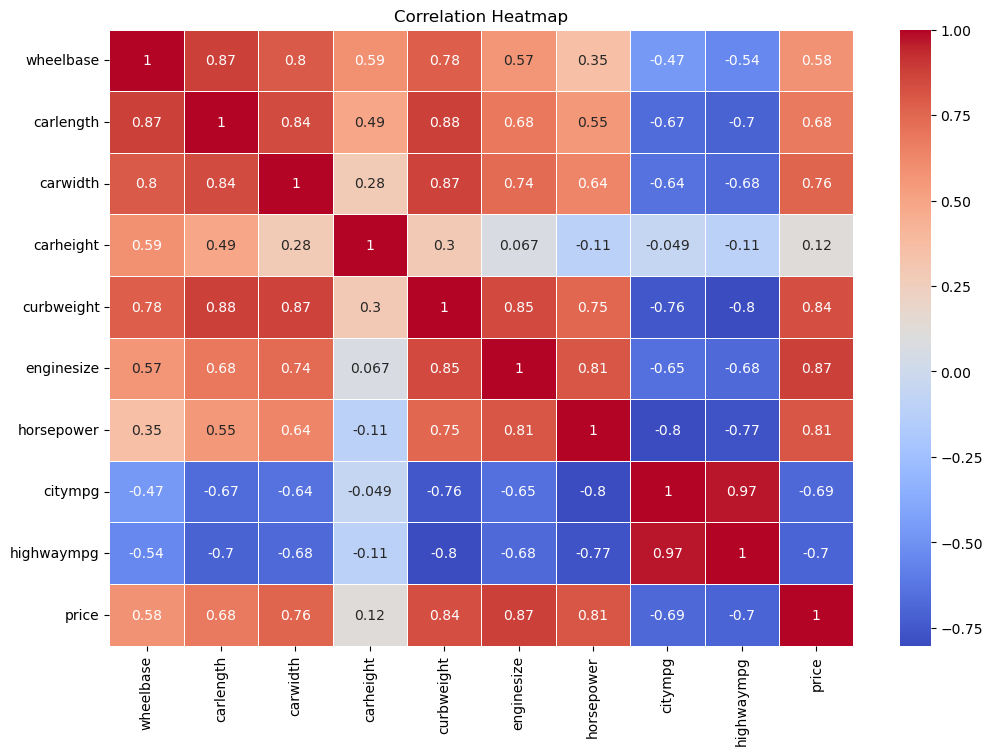

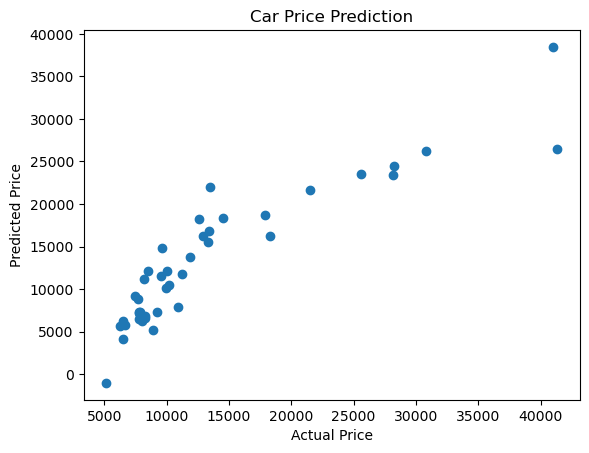

In [19]:

# Visualizing correlation heatmap
correlation_matrix = data[features + ['price']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Visualizing predicted prices vs. actual prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Car Price Prediction')
plt.show()
